
# LMS least mean square

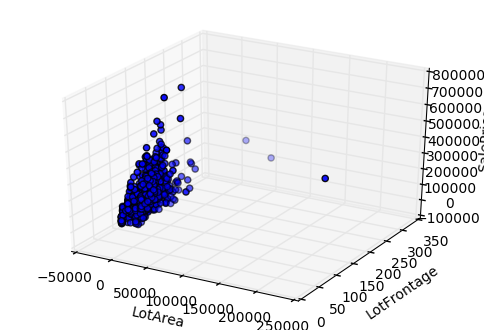

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('train.csv')
X = data[['LotArea','LotFrontage']]
Y = data['SalePrice']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['LotArea'], X['LotFrontage'], Y, c = 'blue', marker = 'o')
ax.set_xlabel('LotArea')
ax.set_ylabel('LotFrontage')
ax.set_zlabel('SalePrice')
plt.show()

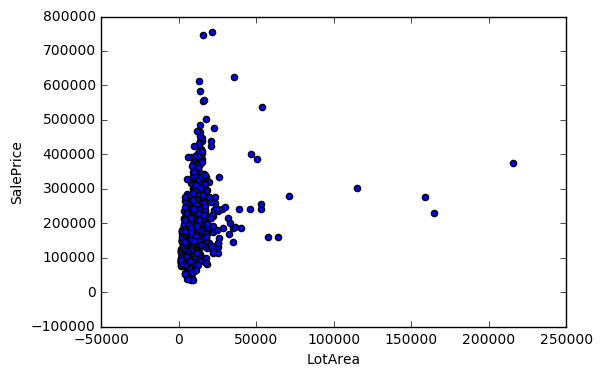

In [2]:
X = data['LotArea']
plt.scatter(X, Y, c = 'blue')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

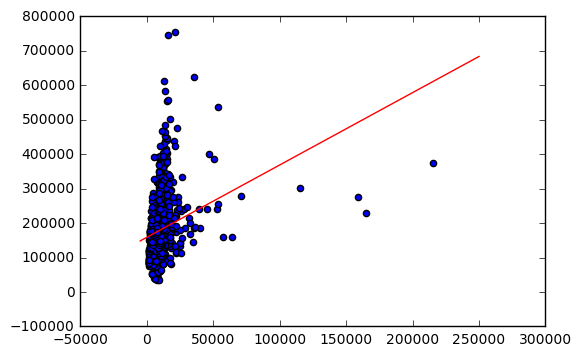

4.28345904943e+12


In [3]:
#analytic solution
from numpy.linalg import inv

#prepare data
Y = np.asarray(data['SalePrice'])
X = np.asarray(data['LotArea'])
N = len(X)
ones = np.ones([N, 1])
X = np.hstack((ones, X.reshape(N, 1)))

#least square solution
ThetaOpt = inv(X.T.dot(X)).dot(X.T).dot(Y)

#regression line
NN = 10000
x = np.linspace(-5000, 250000, NN).reshape(NN, 1)
ones = np.ones([NN, 1])
x = np.hstack((ones, x))
y_hat = x.dot(ThetaOpt.T)

#plot
plt.scatter(X[:,1], Y, c = 'blue')
plt.plot(x[:,1], y_hat, c = 'red')
plt.show()

#squared loss function
def J(Y_hat, Y):
    return (Y_hat - Y).dot((Y_hat - Y).T)/2

Y_hat = X.dot(ThetaOpt.T)

print(J(Y_hat, Y))

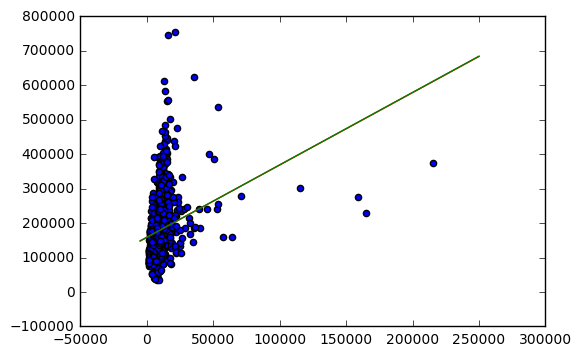

4.28345989997e+12


In [5]:
#gd solution

#initialization
Theta_gd = np.array([1.588e+05, 2])
Y_hat_gd = np.ones(N)
alpha = 6.5e-12

#gd iteration
while J(Y_hat_gd, np.asarray(Y)) > 4.2834599e+12:
    Y_hat_gd = np.dot(X, Theta_gd)
    Theta_gd = Theta_gd + alpha*np.dot((np.asarray(Y) - Y_hat_gd), X)
    #print(J(Y_hat, np.asarray(Y)))

#gd regression line
y_hat_gd = x.dot(Theta_gd.T)
y_hat = x.dot(ThetaOpt.T)

#plot
plt.scatter(X[:,1], Y, c = 'blue')
plt.plot(x[:,1], y_hat, c = 'red')
plt.plot(x[:,1], y_hat_gd, c = 'green')
plt.show()

#print final loss
print(J(Y_hat_gd, Y))

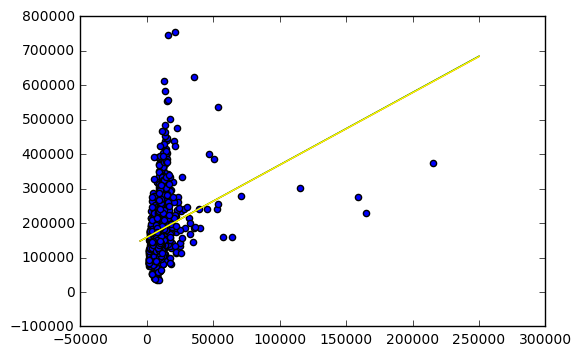

4.28345957243e+12


In [21]:
#sgd solution
import random

#initialization
Theta_sgd = np.array([1.588e+05, 2])
Y_hat_sgd = np.ones(N)

#SGD iteration: simplely choosing one random case to update paramaters
while J(Y_hat_sgd, np.asarray(Y)) > 4.2834599e+12:
    randInd = random.randint(0,N-1)
    Y_hat_sgd = np.dot(X, Theta_sgd)
    Theta_sgd = Theta_sgd + alpha*(Y[randInd] - Y_hat_sgd[randInd])*X[randInd,:]
    
#sgd regression line
y_hat_sgd = x.dot(Theta_sgd.T)

#plot
plt.scatter(X[:,1], Y, c = 'blue')
plt.plot(x[:,1], y_hat, c = 'red')
plt.plot(x[:,1], y_hat_gd, c = 'green')
plt.plot(x[:,1], y_hat_sgd, c = 'yellow')
plt.show()

#print final loss
print(J(Y_hat_sgd, Y))